# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | LEMARCHANT HUGO - LEMH03039705 * TAN ELODIE - TANE25619607 * JACQUES-SYLVAIN LECOINTRE LECJ19128301 |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2018                                            |
| Groupe                | C                                                       |
| Numéro du laboratoire | 02                                                      |
| Professeur            | Prof. Hervé Lombaert                                    |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 11/10/2018                                              |

In [159]:
# -*- coding:utf-8 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os, random
import math
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.ndimage as nd
import csv
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

## Galaxy Zoo

In [164]:
feature_vectors = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
labels = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',')

In [177]:
X_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,0:-1]
Y_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,-1:].astype(int).flatten()

In [178]:
print(X_galaxy.shape)
print(Y_galaxy.shape)

(16908, 75)
(16908,)


In [179]:
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

##### Utilisons les caracteristiques du TP1 dans le vecteur d'entree (qu'est ce qui garanti que l'ordre des observations de galaxy_feature_vectors.csv soit le meme que celles du TP1 ? )

In [198]:
X_galaxy_TP1 = pd.read_csv('vectors_TP1.csv', delimiter = ',', header=None).values[-1]
# utilisons uniquement circularite et aspect ratio ratio
#X_galaxy_TP1_1= np.concatenate([X_galaxy,X_galaxy_TP1[:,0:2]],axis=1)

In [ ]:
 pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)[75].head(6)

In [278]:
labels.head(5)

,id,class
0,100090,smooth
1,100134,spiral
2,100322,spiral
3,100380,spiral
4,100458,smooth


### KNN 
#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [48]:
accuracies_uniform = []
f1_scores_uniform = []

accuracies_distance = []
f1_scores_distance = []

In [49]:
for n_neigh in (3, 5, 10):
    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='uniform')

    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    accuracies_uniform.append(acc)
    f1_scores_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='distance')
    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    accuracies_distance.append(acc)
    f1_scores_distance.append(f1)

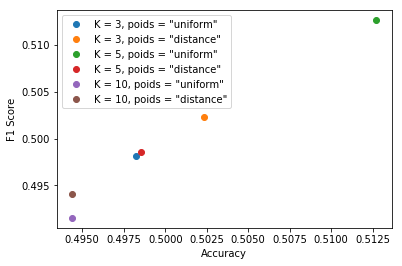

In [50]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(accuracies_uniform[i], f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(accuracies_distance[i], f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

## Spam

In [108]:
df = pd.read_csv('spam.csv', delimiter = ',', header=None)
X_mail = df.loc[:, 0:56]
Y_mail = df.loc[:, 57]

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(X_mail, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

### Arbres de décision
#### Max-depth : none

In [109]:
accuracies = []
f1_scores = []

In [110]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies.append(acc)
f1_scores.append(f1)

#### Max-depth : 3, 5, 10

In [111]:
for depth in (3, 5, 10):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies.append(acc)
    f1_scores.append(f1)

### Arbres de décision - Accuracy & F1 Score

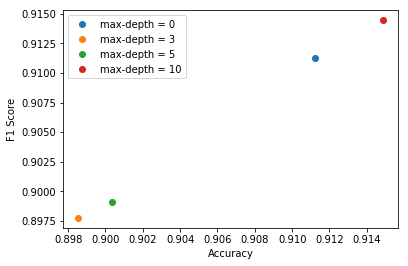

In [112]:
for i, label in zip(range(0, 4), (0, 3, 5, 10)):
    plt.plot(accuracies[i], f1_scores[i], "o", label='max-depth = {}'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

### Arbres de décision - Cross validation

D'après le graphique des Accuracy et F1 scores, on se rend compte que le meilleur hyperparamètre pour les arbres de décision pour Spam est `max-depth = 10.` La Validation croisee sera donce effectuee avec l'hyperparamètre `max-depth = 10.` .

In [199]:
K = 10
clf = tree.DecisionTreeClassifier(max_depth = 10)
scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(scores)/K)

0.9144811289793239


### KNN 
#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [114]:
accuracies_uniform = []
f1_scores_uniform = []

accuracies_distance = []
f1_scores_distance = []

In [115]:
for n_neigh in (3, 5, 10):
    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='uniform')

    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies_uniform.append(acc)
    f1_scores_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='distance')
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies_distance.append(acc)
    f1_scores_distance.append(f1)

### KNN - Accuracy & F1 Scores

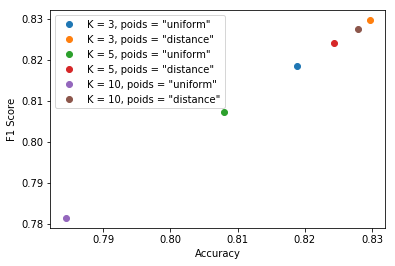

In [116]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(accuracies_uniform[i], f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(accuracies_distance[i], f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

### KNN - Cross-validation

In [117]:
K = 10
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(scores)/K)

0.8029222185756482


### Bayes Naive
#### Gaussian

In [118]:
clf = GaussianNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc_gauss = accuracy_score(Ym_test, Y_pred)
f1_gauss = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_gauss))
print("Score F1 : {}".format(f1_gauss))

Précision : 0.8387681159420289
Score F1 : 0.8402037805334562


#### Multinomial

In [119]:
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X_mail) 

scaler = preprocessing.MinMaxScaler()
Xm_scaled = scaler.fit_transform(X_mail)

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm_scaled, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

clf = MultinomialNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc_multi = accuracy_score(Ym_test, Y_pred)
f1_multi = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_multi))
print("Score F1 : {}".format(f1_multi))


Précision : 0.9094202898550725
Score F1 : 0.9076189451243262


/Users/jslecointre/anaconda/envs/gti770/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Bayes - validation croisee

In [120]:
K = 10
clf = MultinomialNB()
scores = cross_val_score(clf, Xm_scaled, Y_mail, cv= K)
print(sum(scores)/K)

0.898148999015425


### Bayes - Leave one out

## Analyse de galaxies

Nous n'avons pas utilisé la recherche par grille pour les données Spam, mais nous allons l'utiliser ici pour définir les meilleurs hyperparamètres pour l'algorithme des K-plus proches voisins. Nous aurions pu l'utiliser dans les cas précédents mais cela ne change rien en terme de résultats purs.

### KNN 

In [180]:
galaxy_accuracies_uniform = []
galaxy_f1_scores_uniform = []

galaxy_accuracies_distance = []
galaxy_f1_scores_distance = []

parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[3, 5, 10]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters, cv=10)
clf.fit(X_galaxy, Y_galaxy)

print(clf.best_params_)

#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [200]:
for n_neigh in (3, 5, 10):

    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='uniform')

    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    galaxy_accuracies_uniform.append(acc)
    galaxy_f1_scores_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='distance')
    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    galaxy_accuracies_distance.append(acc)
    galaxy_f1_scores_distance.append(f1)

#### KNN - Accuracy & F1 Scores

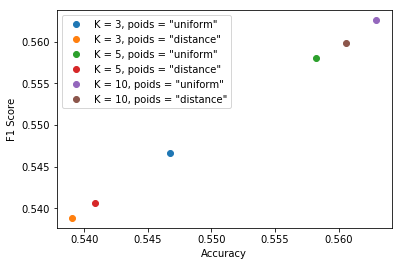

[0.5467179183914843, 0.5582495564754583, 0.5629804849201656, 0.9127735068007097, 0.9139562389118865, 0.9130691898285038]
[0.546580009350169, 0.5580209973466429, 0.5625866823342862, 0.9128045620129149, 0.9139868730364687, 0.9130881609485738]
[0.539030159668835, 0.5408042578356003, 0.560615020697812, 0.9127735068007097, 0.9139562389118865, 0.9210526315789473]
[0.538831071662403, 0.5405746872272853, 0.5598099126473268, 0.9128045620129149, 0.9139868730364687, 0.921080081507389]


In [201]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(galaxy_accuracies_uniform[i], galaxy_f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(galaxy_accuracies_distance[i], galaxy_f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()
print(galaxy_accuracies_uniform)
print(galaxy_f1_scores_uniform)
print(galaxy_accuracies_distance)
print(galaxy_f1_scores_distance)

#### KNN - Cross-validation
Nous obtenons de meilleurs résultats lorsque K = 10 et que le poids est uniforme. Nous allons donc faire la validation croisée avec ces hyperparamètres.

In [208]:
nfold = 10
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
scores = cross_val_score(clf, X_galaxy, Y_galaxy, cv=nfold)
print (scores)
print(sum(scores)/nfold)

[0.58865248 0.57446809 0.57362507 0.54405677 0.56771141 0.56002365
 0.5556213  0.58047337 0.5556213  0.57159763]
0.5671851089912532


In [209]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf = clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)
CM = confusion_matrix(Y_pred, Yg_test)

print(classification_report(Y_pred,Yg_test))
print(CM)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1731
           1       0.89      0.94      0.91      1651

   micro avg       0.91      0.91      0.91      3382
   macro avg       0.91      0.91      0.91      3382
weighted avg       0.91      0.91      0.91      3382

[[1532  199]
 [  95 1556]]


### Bayes
#### Loi Gaussienne (normale)

In [210]:
clf = GaussianNB()
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

acc_gauss = accuracy_score(Yg_test, Y_pred)
f1_gauss = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_gauss))
print("Score F1 : {}".format(f1_gauss))

Précision : 0.6088113542282673
Score F1 : 0.5562405046055754


#### Loi Multinomiale

In [260]:
scaler = preprocessing.MinMaxScaler()
Xg_scaled = scaler.fit_transform(X_galaxy)
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(Xg_scaled, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

Recherche de l'hyperparametre alpha pour la loi multinomiale

In [261]:
NBParamGrid=dict(alpha=np.linspace(0,2,20)[1:])
paramsearch = GridSearchCV(estimator=MultinomialNB(), param_grid=NBParamGrid, n_jobs=6,cv=10)
paramsearch.fit(Xg_train, Yg_train)
selected_alpha = paramsearch.best_estimator_.alpha
print(selected_alpha)

1.5789473684210527


La meilleure valeur de alpha est 1.578 et sera utilisee par la suite pour la validation

#### Bayes - Loi multinomiale - avec holdout validation

In [271]:
clf = MultinomialNB(alpha=selected_alpha)
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

acc_multi = accuracy_score(Yg_test, Y_pred)
f1_multi = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_multi))
print("Score F1 : {}".format(f1_multi))

Précision : 0.7897693672383205
Score F1 : 0.789556798757904


#### Bayes - Loi multinomiale - avec validation croisee

In [272]:
K = 10
clf = MultinomialNB(alpha=selected_alpha)
scores = cross_val_score(clf, Xg_scaled, Y_galaxy, cv= K)
print(sum(scores)/K)

0.7938833220883036


DOCUMENTATION : Le prof a dit d'utiliser ça : http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

## Question 1
### Méthode de création des ensembles de données
Nous avons essentiellement utilisé les méthodes de la librairie Scikitlearn pour créer nos ensembles de données. Nous utilisons train_test_split pour entrainer des algorithmes avec des validations en holdout, et cross_val_score pour des entrainements avec K fold cross validation. Cette librairie nous offre des moyens simples d'utilisation pour générer des ensembles de tailles pré-déterminée et mélangés pour simuler des conditions au plus proche d'un cas d'utilisation réelle compte tenu de nos données.

## Question 1
### Détails des ensembles produits


## Question 2
### Approche de validation proposée et justification
Nous avons choisi de pratiquer des K fold cross validations pour valider la totalité de nos apprentissages car nous pensons que c'est le meilleur compromis parmi K flod CV, leave one out, leave P out et holdout. En effet il nous permet de tester suffisamment de cas de figures d'entrainements pour être confiant sur l'apprentissage suffisamment général par rapport à holdout mais sans pour autant être aussi gourmand en ressources que leave one out ou leave P out.

## Question 3
### Matrice des expérimentations

|Données|Pourriels|Galaxies|
|-------|---------|--------|
|Arbre de décision d=3|Acc = 0.8983, F1 = 0.8975|None|
|Arbre de décision d=5|Acc = 0.9000, F1 = 0.8990|None|
|Arbre de décision d=10|Acc = 0.9155, F1 = 0.9145|None|
|Arbre de décision d=inf|Acc = 0.9133, F1 = 0.9130|None|
|Arbre de décision 10-CV|0.9098|None|
|3-NN Uniform|Acc = 0.82, F1 = 0.82|Acc = 0.4982, F1 = 0.4981|
|3-NN Distance|Acc = 0.83, F1 = 0.83|Acc = 0.5023, F1 = 0.5023|
|5-NN Uniform|Acc = 0.809, F1 = 0.809|Acc = 0.5127, F1 = 0.5126|
|5-NN Distance|Acc = 0.825, F1 = 0.825|Acc = 0.4985, F1 = 0.4986|
|10-NN Uniform|Acc = 0.783, F1 = 0.782|Acc = 0.4943, F1 = 0.4915|
|10-NN Distance|Acc = 0.828, F1 = 0.828|Acc = 0.4943, F1 = 0.4941|
|3-NN Distance 10-CV|0.8029|0.5044|
|Bayes Gaussian|Acc = 0.826, F1 = 0.828|Acc = 0.5147, F1 = 0.4504|
|Bayes Multinomial|Acc = 0.9094, F1 = 0.9076|Acc = 0.9094, F1 = 0.9076|
|Bayes Multinomial 10-CV|0.0898|0.8981|



### Etude des hyperparamètres

#### Arbres de décision  
D'après nos données, plus la profondeur de l'arbre est élevée, plus la précision et le score F1 sont élevés. Lors de l'apprentissage, plus l'arbre est grand, plus l'entropie donc la pureté de nos ensembles de données est meilleure. Dans le cas d'apprentissage pour les spams, la profondeur de 10 ne semble pas causer de sur-apprentissage.   

#### KNN  
`poids = uniform` veut dire que chaque voisin aura le même poids alors que `poids = distance` donne un poids différent à chaque voisin pour la décision de l'algorithme KNN, qui est proportionnelle à l'inverse de la distance au point dont nous voulons connaitre la classe.  
Dans le cas des spams, les meilleurs hyperparamètres sont : `nombre de voisins = 3` et `poids = distance`. Nous pouvons expliquer cela par le fait que....
De plus, nous pouvons remarquer que lorsque l'hyperparamètre du poids est égal à $distance$, les résultats sont significativement meilleurs. En effet, les voisins les plus proches aideront à mieux discriminer le point étudié. 

#### Bayes  
Le meilleur résultat pour l'algorithme de Bayes naïf est lorsque celui-ci est multinomial, avec les hyperparamètres `MinMaxScaler` et la `K-Bins discretization`.   
D'après la définition de Scikit-learn, `MinMaxScaler` transforme les primitives en les mettant à l'échelle entre 0 et 1. Cela permet de minimiser les différences d'échelle entre les différents attributs. (Ex : un attribut entre 0 et 1000 et un attribut entre 0 et 1).  
`KBinsDiscretizer` permet de discrétiser les attributs continus que nous avons en entrée. Cela permet de réduire les différences entre les différentes valeurs que peut prendre l'attribut, ce qui permet de mieux les regrouper entre eux.

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

D'après nos différentes analyses, les ensembles de données qui se démarquent le mieux sont ceux sont les attributs sont discrétisés. En effet, comme expliqué précédemment, cela permet de regrouper un ensemble de valeurs différentes ensemble. Pour ce qui est de la taille des ensembles de données, nous avons beaucoup moins d'exemples pour les spams que pour les galaxies. Cependant, le cas des spams donne des erreurs beaucoup plus faibles que le cas des galaxies. Nous pouvons expliquer cela par le fait que les primitives de Spam sont plus discriminantes que celles des galaxies. Nous pouvons donc déduire de ces exemples que la taille des ensembles des données n'aide pas forcément à une meilleure classification des données. En effet, la qualité des primitives joue un rôle principal dans les classifications. Cependant, lorsque les privitives discriminent bien les données, il est évident qu'un nombre plus important d'exemples d'apprentissage va favoriser une meilleure classification des données.

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

## Question 6
### Discussion sur la nature des données

Les données `Spam` sont extraites de différents mails, qui sont eux même composés d'une série de mots. Les données `Galaxy` sont quant à elles des images. Il est clairement plus difficile d'extraire de bonnes primitives sur des images que sur un texte simple. En effet, il faut tout d'abord effectuer plusieurs pré-traitements sur les images pour pouvoir extraire des données qui ne sont pas complètement sûres, par rapport à un nombre d'enchainement de mots écrits en majuscule dans un texte par exemple.  
C'est pourquoi nous arrivons mieux à classifier les mails en Spam que les différents types de galaxies.

## Question 7
### Recommandations

## Question 8
### Améliorations possibles